<a id="1"></a> 
# <p style="padding:15px;background-color:#022629;margin:0;color:#91f2eb;font-family:Verdana,sans-serif;font-size:9-0%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:900">Sistem Rekomendasi Produk Pada Toko Alat Tulis dan Peralatan Kantor</p>

<div style="background-color:#91f2eb; padding:30px; font-size:14px; border-radius: 5px 5px;">

**🛒Goal:** 
    
Setiap bulan atau tahun, retailer dapat mengunggah data penjualan produk dalam format CSV, yang mencakup informasi penjualan harian. Aplikasi ini akan secara otomatis memperbarui database dengan data terbaru, memungkinkan sistem untuk terus belajar dan beradaptasi dengan pola pembelian pelanggan. Dengan cara ini, rekomendasi produk selalu segar dan sesuai dengan tren terbaru di bidang alat tulis dan peralatan kantor.

Menggunakan teknik Market Basket Analysis, aplikasi kami menganalisis data penjualan untuk menemukan asosiasi produk yang sering dibeli bersama. Algoritma seperti Apriori atau FP-Growth akan membantu mengidentifikasi 10 produk teratas yang paling relevan untuk ditampilkan pada banner di depan toko, baik itu produk seperti pulpen, kertas, map, printer, atau perlengkapan kantor lainnya. Ini tidak hanya meningkatkan visibilitas produk, tetapi juga mendorong penjualan dengan strategi pemasaran yang lebih cerdas.

<div style="background-color:#91f2eb; padding:30px; font-size:14px; border-radius: 5px 5px;">
    
**📃 Data:**

| No  | Column     | Deskripsi Singkat                                                                  |
|-----|------------|------------------------------------------------------------------------------------|
| 1   | branch     | Nama atau kode cabang toko tempat transaksi terjadi.                               |
| 2   | divisi     | Divisi dalam toko yang bertanggung jawab atas produk (misalnya, alat tulis, furnitur, dll.). |
| 3   | transaksi  | Kode unik yang merepresentasikan transaksi tertentu.                               |
| 4   | tanggal    | Tanggal transaksi dilakukan.                                                       |
| 5   | customer   | Identitas atau kode unik pelanggan yang melakukan transaksi.                       |
| 6   | cs         | Customer service yang melayani transaksi tersebut.                                 |
| 7   | produk     | Nama produk yang dibeli oleh pelanggan.                                            |
| 8   | quantity   | Jumlah produk yang dibeli dalam transaksi.                                         |
| 9   | satuan     | Satuan produk yang dijual (misalnya, pcs, box, dll.).                              |
| 10  | omset      | Total pendapatan dari transaksi tersebut, dalam satuan mata uang (misalnya, Rupiah).|
    
    
 **Divisi**:
1. **JLD**: Divisi **Jilid**. Berfokus pada produk yang terkait dengan proses penjilidan seperti mesin jilid, kertas jilid, dan aksesori penjilidan lainnya.

2. **ATK**: Divisi **Alat Tulis Kantor**. Menyediakan berbagai perlengkapan kantor seperti pulpen, pensil, penghapus, buku catatan, stapler, dan perlengkapan kantor lainnya.

3. **CTK**: Divisi **Cetak**. Menyediakan layanan dan produk terkait pencetakan seperti printer, tinta, kertas cetak, dan layanan percetakan dokumen.

4. **PC**: Divisi **Personal Computer (PC)**. Menjual perangkat keras komputer, aksesoris, dan komponen terkait seperti komputer desktop, mouse, keyboard, dan monitor.

5. **Pinjaman Sementara**: Divisi ini mungkin menyediakan layanan pinjaman peralatan sementara kepada pelanggan, misalnya, pinjaman alat kantor seperti proyektor atau mesin fotokopi untuk penggunaan jangka pendek.

6. **OE**: Divisi **Office Equipment (Peralatan Kantor)**. Berfokus pada penjualan peralatan besar untuk kantor seperti mesin fotokopi, mesin fax, scanner, dan perangkat elektronik lainnya.

7. **LCD**: Divisi **LCD**. Menjual layar dan perangkat tampilan seperti monitor LCD atau proyektor yang digunakan dalam presentasi atau kebutuhan kantor lainnya.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
import time
import math
import itertools
import matplotlib.pyplot          as plt
import plotly.graph_objs as go
import plotly.express    as px
import matplotlib.colors as mcolors

In [3]:
from   pyforest          import *
from   tqdm              import tqdm
from   plotly.offline    import iplot
from   scipy             import stats
from   termcolor         import colored
from   sklearn           import metrics
from   plotly.subplots   import make_subplots
from   sklearn.metrics   import accuracy_score
from   datetime          import date, timedelta
from   sklearn.metrics   import silhouette_score, calinski_harabasz_score

from   pyECLAT                    import ECLAT
from   mlxtend.preprocessing      import TransactionEncoder
from   mlxtend.frequent_patterns  import apriori, association_rules, fpgrowth

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

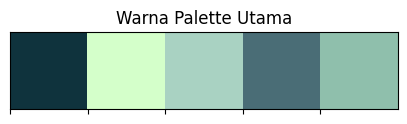

In [4]:
# kumpulan warna palet
colors     = ["#0F333D", "#D4FFCA", "#A9D2C2", "#4A6D76", "#8FBFAC"]
my_palette = sns.color_palette(["#0F333D", "#D4FFCA", "#A9D2C2", "#4A6D76", "#8FBFAC"])
cmap       = mcolors.ListedColormap(colors)

sns.palplot(sns.color_palette(colors))
plt.title('Warna Palette Utama')
plt.show()

<a id="1"></a> 
# <p style="padding:15px;background-color:#022629;margin:0;color:#91f2eb;font-family:Verdana,sans-serif;font-size:9-0%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:900">2. Data Understanding</p>

In [5]:
data = pd.read_csv('C:/Users/ASUS/kode/projek/25. Lomba DST/data_transaction_2021-2023_Stationary, Digital Printing and Office Equipment Data Transaction.csv')

<IPython.core.display.Javascript object>

In [6]:
df = pd.DataFrame(data)
df

<IPython.core.display.Javascript object>

,branch,divisi,transaksi,tanggal,customer,cs,produk,quantity,satuan,omset
0,Utama,JLD,4958/JL/UTM/1223,2023-12-30 09:37:02,Member,ITA,CETAK POSTER,3.0,lbr,45000.0
1,Utama,ATK,4958/JL/UTM/1223,2023-12-30 09:37:02,Member,ITA,STEROFOAM 2x1 M KETEBALAN 2 CM,1.0,pcs,75000.0
2,Utama,CTK,4958/JL/UTM/1223,2023-12-30 09:37:02,Member,ITA,NAME PIN SWISSBEL,2.0,bh,170000.0
3,Utama,PC,4959/JL/UTM/1223,2023-12-30 09:40:47,Member,DIJA,PHOTO COPY HVS F4/A4S 70 GR,6190.0,lbr,1857000.0
4,Utama,PC,4959/JL/UTM/1223,2023-12-30 09:40:47,Member,DIJA,PHOTO COPY HVS WARNA F4/A4S 70 GR,830.0,lbr,290500.0
...,...,...,...,...,...,...,...,...,...,...
296224,Digital Printing,LCD,0263119JL0121,2021-01-04 18:04:16,Normal,NUR,LASER COLOR PRINT 70-120 gr 10+ (C),15.0,lbr,60000.0
296225,Digital Printing,LCD,0263119JL0121,2021-01-04 18:04:16,Normal,NUR,BIAYA POTONG,15.0,lbr,112500.0
296226,Digital Printing,LCD,0263118JL0121,2021-01-04 18:06:59,Normal,SORAYA,LASER COLOR PRINT STIKER 1+ (C),7.0,lbr,52500.0
296227,Digital Printing,LCD,0263118JL0121,2021-01-04 18:06:59,Normal,SORAYA,LASER CLR P 260/B/J/L/BC 1+ (C ),1.0,lbr,6000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296229 entries, 0 to 296228
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   branch     296229 non-null  object 
 1   divisi     296229 non-null  object 
 2   transaksi  296229 non-null  object 
 3   tanggal    296229 non-null  object 
 4   customer   296229 non-null  object 
 5   cs         296229 non-null  object 
 6   produk     296229 non-null  object 
 7   quantity   296229 non-null  float64
 8   satuan     296229 non-null  object 
 9   omset      296229 non-null  float64
dtypes: float64(2), object(8)
memory usage: 22.6+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,296229.0,51.868673,1.047315e+03,0.0,1.0,2.0,8.0,410000.0
omset,296229.0,228320.495420,2.137796e+06,0.0,15000.0,40000.0,120000.0,800000000.0


In [9]:
df['divisi'].unique()

array(['JLD', 'ATK', 'CTK', 'PC', 'Pinjaman Sementara', 'OE', 'LCD'],
      dtype=object)

In [10]:
df['cs'].unique()

array(['ITA', 'DIJA', 'YAYA', 'ELVIRA', 'ALDA', 'IDA', 'NILAM', 'ANGEL',
       'MARIA', 'YULI', 'FITA', 'NORIS', 'RINA', 'unknown', 'WILA',
       'DICKY', 'BUDI', 'MILKHA', 'MIMI', 'BELA', 'OKKY', 'TERE', 'INANG',
       'CIKA', 'LEONY', 'ARIF', 'ONI', 'ALDY', 'NICIA', 'S.000004',
       'YUDI', 'RYAN', 'ALDE', 'FEKI', 'ILHA', 'ZIDAN', 'HENDRI', 'OPAN',
       'FERDY', 'MELSI', 'IKHA', 'JUFRY', 'ADM', 'NURUL', 'GRACE',
       'SORAYA', 'LASTRI', 'IKA', 'LIDYA', 'MAYA', 'GRACEMLM', 'KAREN',
       'RIA', 'NITA', 'SAKINA', 'IRA', 'YASNI', 'EKHA', 'MELSY', 'NUR',
       'RENDY'], dtype=object)

In [11]:
df['branch'].unique()

array(['Utama', 'Office Equipment', 'Digital Printing'], dtype=object)

In [12]:
df['customer'].unique()

array(['Member', 'Normal'], dtype=object)

In [13]:
df['transaksi'].nunique()

189351

In [14]:
c = list(df['produk'].value_counts())
d = list(df['produk'].unique())
top_20_produk = pd.DataFrame(list(zip(d[0:21],c[0:21])),columns =['produk', 'Count'])
top_20_produk

<IPython.core.display.Javascript object>

,produk,Count
0,CETAK POSTER,26836
1,STEROFOAM 2x1 M KETEBALAN 2 CM,14294
2,NAME PIN SWISSBEL,11753
3,PHOTO COPY HVS F4/A4S 70 GR,10074
4,PHOTO COPY HVS WARNA F4/A4S 70 GR,8796
5,JILID HARD COVER,8217
6,CETAK NCR 1/4F 1 WRN 2 PLY,7442
7,EPSON TINTA PRINT 65 ML SERIES 003 WARNA HITAM,6945
8,SABLON BOTOL TUMBLER,6618
9,POP-1 KERTAS THERMAL UK. 57 x 47 MM,5527


In [15]:
df2 = df.copy()
dup_transaksi = df[df.duplicated(subset='transaksi', keep=False)]

- Tipe Data
- Missing Value
- Duplikat
- Outlier
- Distribusi Statistik

#### Menggabungkan setiap id transaksi yang sama

In [16]:
dup_transaksi

,branch,divisi,transaksi,tanggal,customer,cs,produk,quantity,satuan,omset
0,Utama,JLD,4958/JL/UTM/1223,2023-12-30 09:37:02,Member,ITA,CETAK POSTER,3.0,lbr,45000.0
1,Utama,ATK,4958/JL/UTM/1223,2023-12-30 09:37:02,Member,ITA,STEROFOAM 2x1 M KETEBALAN 2 CM,1.0,pcs,75000.0
2,Utama,CTK,4958/JL/UTM/1223,2023-12-30 09:37:02,Member,ITA,NAME PIN SWISSBEL,2.0,bh,170000.0
3,Utama,PC,4959/JL/UTM/1223,2023-12-30 09:40:47,Member,DIJA,PHOTO COPY HVS F4/A4S 70 GR,6190.0,lbr,1857000.0
4,Utama,PC,4959/JL/UTM/1223,2023-12-30 09:40:47,Member,DIJA,PHOTO COPY HVS WARNA F4/A4S 70 GR,830.0,lbr,290500.0
...,...,...,...,...,...,...,...,...,...,...
296224,Digital Printing,LCD,0263119JL0121,2021-01-04 18:04:16,Normal,NUR,LASER COLOR PRINT 70-120 gr 10+ (C),15.0,lbr,60000.0
296225,Digital Printing,LCD,0263119JL0121,2021-01-04 18:04:16,Normal,NUR,BIAYA POTONG,15.0,lbr,112500.0
296226,Digital Printing,LCD,0263118JL0121,2021-01-04 18:06:59,Normal,SORAYA,LASER COLOR PRINT STIKER 1+ (C),7.0,lbr,52500.0
296227,Digital Printing,LCD,0263118JL0121,2021-01-04 18:06:59,Normal,SORAYA,LASER CLR P 260/B/J/L/BC 1+ (C ),1.0,lbr,6000.0


In [17]:
df2.duplicated().sum()

3273

In [18]:
df2 = df2.drop_duplicates()

In [19]:
df2.duplicated().sum()

0

In [20]:
df2.isna().sum()

branch       0
divisi       0
transaksi    0
tanggal      0
customer     0
cs           0
produk       0
quantity     0
satuan       0
omset        0
dtype: int64

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292956 entries, 0 to 296228
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   branch     292956 non-null  object 
 1   divisi     292956 non-null  object 
 2   transaksi  292956 non-null  object 
 3   tanggal    292956 non-null  object 
 4   customer   292956 non-null  object 
 5   cs         292956 non-null  object 
 6   produk     292956 non-null  object 
 7   quantity   292956 non-null  float64
 8   satuan     292956 non-null  object 
 9   omset      292956 non-null  float64
dtypes: float64(2), object(8)
memory usage: 24.6+ MB


In [22]:
cobaTes_transaksi = df2[df2['transaksi'] == '0263119JL0121']
cobaTes_transaksi

,branch,divisi,transaksi,tanggal,customer,cs,produk,quantity,satuan,omset
296223,Digital Printing,LCD,0263119JL0121,2021-01-04 18:04:16,Normal,NUR,LASER CLR P 260/B/J/L/BC 10+ (C ),10.0,lbr,50000.0
296224,Digital Printing,LCD,0263119JL0121,2021-01-04 18:04:16,Normal,NUR,LASER COLOR PRINT 70-120 gr 10+ (C),15.0,lbr,60000.0
296225,Digital Printing,LCD,0263119JL0121,2021-01-04 18:04:16,Normal,NUR,BIAYA POTONG,15.0,lbr,112500.0


In [23]:
df2.columns

Index(['branch', 'divisi', 'transaksi', 'tanggal', 'customer', 'cs', 'produk',
       'quantity', 'satuan', 'omset'],
      dtype='object')

In [24]:
df2['transaksi'].unique()

array(['4958/JL/UTM/1223', '4959/JL/UTM/1223', '4960/JL/UTM/1223', ...,
       '0263115JL0121', '0263119JL0121', '0263118JL0121'], dtype=object)

In [25]:
transaksi_1 = df2['transaksi'].str.len() >= 10

transaksi_bersih_1 = df2[transaksi_1]
transaksi_bersih_1

,branch,divisi,transaksi,tanggal,customer,cs,produk,quantity,satuan,omset
0,Utama,JLD,4958/JL/UTM/1223,2023-12-30 09:37:02,Member,ITA,CETAK POSTER,3.0,lbr,45000.0
1,Utama,ATK,4958/JL/UTM/1223,2023-12-30 09:37:02,Member,ITA,STEROFOAM 2x1 M KETEBALAN 2 CM,1.0,pcs,75000.0
2,Utama,CTK,4958/JL/UTM/1223,2023-12-30 09:37:02,Member,ITA,NAME PIN SWISSBEL,2.0,bh,170000.0
3,Utama,PC,4959/JL/UTM/1223,2023-12-30 09:40:47,Member,DIJA,PHOTO COPY HVS F4/A4S 70 GR,6190.0,lbr,1857000.0
4,Utama,PC,4959/JL/UTM/1223,2023-12-30 09:40:47,Member,DIJA,PHOTO COPY HVS WARNA F4/A4S 70 GR,830.0,lbr,290500.0
...,...,...,...,...,...,...,...,...,...,...
296224,Digital Printing,LCD,0263119JL0121,2021-01-04 18:04:16,Normal,NUR,LASER COLOR PRINT 70-120 gr 10+ (C),15.0,lbr,60000.0
296225,Digital Printing,LCD,0263119JL0121,2021-01-04 18:04:16,Normal,NUR,BIAYA POTONG,15.0,lbr,112500.0
296226,Digital Printing,LCD,0263118JL0121,2021-01-04 18:06:59,Normal,SORAYA,LASER COLOR PRINT STIKER 1+ (C),7.0,lbr,52500.0
296227,Digital Printing,LCD,0263118JL0121,2021-01-04 18:06:59,Normal,SORAYA,LASER CLR P 260/B/J/L/BC 1+ (C ),1.0,lbr,6000.0


In [26]:
df3 = transaksi_bersih_1

In [27]:
grup_df = df3.groupby(['transaksi', 'tanggal'])
aggreg  = {
    'branch': 'first',
    'divisi': 'first',
    'customer': 'first',
    'cs': 'first',
    'produk': lambda x: ', '.join(x),
    'quantity': 'sum',
    'omset': 'sum',
    'satuan': 'first'
}

df3 = grup_df.agg(aggreg).reset_index()

In [30]:
df3

,transaksi,tanggal,branch,divisi,customer,cs,produk,quantity,omset,satuan
0,0001/JL/UTM/0523,2023-05-02 09:31:20,Utama,CTK,Member,ARIF,CETAK DUS MAKANAN CABE HIJAU,1000.0,1950000.0,lbr
1,0001/KSR/UTM/0523,2023-05-02 08:38:25,Utama,ATK,Normal,MILKHA,"DEBOZZ PULPEN ERASABLE DB-591ER 0,5 MM HITAM, ...",20.0,12500.0,pcs
2,0002/KSR/UTM/0123,2023-01-26 16:06:23,Utama,ATK,Normal,S.000004,KIKY BUKU TULIS 98,1.0,22500.0,pcs
3,0002/KSR/UTM/0523,2023-05-02 08:40:14,Utama,PC,Normal,MILKHA,"PHOTO COPY HVS F4/A4S 70 GR, ORIRE STOFMAP KER...",5.0,2000.0,lbr
4,0003/JL/UTM/0523,2023-05-02 09:54:59,Utama,ATK,Member,NILAM,"SIDU KERTAS HVS UKURAN A4 75 GSM, KINGCO MAP B...",2.0,435000.0,dus
...,...,...,...,...,...,...,...,...,...,...
188133,9995/KSR/UTM/1023,2023-10-24 14:04:27,Utama,ATK,Normal,NILAM,3M ISOLASI PE FOAM DOUBLE TAPE GABUS,1.0,15000.0,pcs
188134,9996/KSR/UTM/1023,2023-10-24 14:05:17,Utama,ATK,Normal,BELA,GLACIO CLIPBOARD KULIT WARNA BIRU,1.0,35000.0,pcs
188135,9997/KSR/UTM/1023,2023-10-24 14:14:00,Utama,ATK,Normal,BELA,"SIDU KERTAS HVS UKURAN F4 75 GSM, SIDU KERTAS ...",3.0,176000.0,rim
188136,9998/KSR/UTM/1023,2023-10-24 14:20:21,Utama,JLD,Normal,MARIA,LAMINATING FOLIO,10.0,50000.0,lbr


In [29]:
df4 = df3['produk'].str.split(', ', expand=True)

In [30]:
df4.tail()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
188133,3M ISOLASI PE FOAM DOUBLE TAPE GABUS,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
188134,GLACIO CLIPBOARD KULIT WARNA BIRU,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
188135,SIDU KERTAS HVS UKURAN F4 75 GSM,SIDU KERTAS HVS UKURAN A3 75 GSM,KILAT KANTONG PLASTIK UK. 35,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
188136,LAMINATING FOLIO,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
188137,LENEN KERTAS PUTIH,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [31]:
df_lihat_47 = df4.loc[df4.count(axis=1) >= 47]

In [32]:
df_lihat_47

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
10572,PAPERLINE KERTAS AMPLOP 90 PPS 110X230 MM 80 G...,HEBRON CLEAR HOLDER 40 POCKETS WARNA BIRU,KINGCO CLEAR HOLDER 40 POCKETS,XDATA KERTAS FOTO SINGLE SIDE GLOSSY 2880 DPI ...,AJP MAP L WARNA BENING,BAMBI ODNER BOX FILE 1033 FLUORO PURPLE,STANDARD PULPEN 0.5 JR6 HITAM,MICRO STAR DISPLAY BOOK 60 POCKETS,PILOT PULPEN 0.8 BALL LINER HIJAU,ZRM CUTTER SERIES K-200,...,WINBOOK STICK NOTE Y-167,BENEFIT POST-IT IM-708 7 WARNA,T&J STICK NOTE 240 LEMBAR 6 WARNA,PILOT PULPEN 0.8 BALL LINER HITAM,KIKY BUKU ALBUM KWARTO ISI 100 LBR,SUKHOI BUKU ALBUM ISI 100,OKEY BUKU ALBUM ISI 100 LEMBAR F,SIDU KERTAS HVS UKURAN A4 80 GSM,None,None
11451,SNOWMAN SPIDOL MARKER HITAM,SNOWMAN SPIDOL MARKER BIRU,SNOWMAN SPIDOL PERMANENT MARKER MERAH,ZEBRA STABILO HIGHLIGHTER ORANGE,ZEBRA STABILO HIGHLIGHTER MILD ORANGE,ZEBRA STABILO HIGHLIGHTER MILD BLUE GREEN,BENEFIT SIGN HERE 45X12 MM 125 LEMBAR 5 WARNA,BENEFIT POST-IT IM-708 7 WARNA,SNOWMAN PULPEN 0.7 V-5 BIRU,SNOWMAN PULPEN 0.7 V-5 HITAM,...,POST-IT NOTE TAYO NO.5020 100 PCS,E-PRINT TINTA PRINT SERIES EP41 WARNA ALL,IN-LITE LAMPU 18 WATT PUTIH,DAHLIA NAPTHALENE TOILET K330 300GR,SLEEK HAND WASH 500 ML APPLE,VIXAL PEMBERSIH LANTAI BIRU 750 ML,BAMBI MAP HARD CASE FOLIO WARNA BIRU MUDA,BAMBI MAP HARD CASE FOLIO WARNA MEDIUM BLUE,None,None
49101,BAMBI MAP HARD CASE FOLIO WARNA ORANGE,EPSON TINTA PRINT 65 ML SERIES 003 WARNA HITAM,EPSON TINTA PRINT 65 ML SERIES 003 WARNA MAGENTA,EPSON TINTA PRINT 65 ML SERIES 003 WARNA YELLOW,EPSON TINTA PRINT 65 ML SERIES 003 WARNA CYAN,SANDISK FLASHDISK 8GB,CADWELL PELUBANG KERTAS SERIES CD-40,KINGCO STAMP PAD N0.3,KANGARO HEKTERR HS-45P,KINGCO CUTTER SERIES L-500,...,"DAIMARU LAKBAN 1,5 INCH HITAM",NACHI LAKBAN 46 MM X 12 M HITAM,SDI HEKTER SERIES NO. 10,SAFARI BRAND TIPX CORRECTION PEN,POP-1 MIKA PLASTIK JILID BENING TIPIS,BCPD KERTAS 160 ORANGE,BCPD KERTAS 160 MERAH,BCPD KERTAS 160 BIRU TUA,SIDU KERTAS HVS UKURAN A4 75 GSM,SIDU KERTAS HVS UKURAN F4 75 GSM


#### 20 barang yang sering dibeli secara bersamaan

In [33]:
items_total = df4.apply(pd.Series.value_counts).sum(axis=1)
items_total = pd.DataFrame({'items': items_total.index,
                            'transactions': items_total.values})

items_total.sort_values('transactions',
                         ascending=False).head(20).reset_index(drop=True).style.background_gradient(cmap='ocean_r')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,items,transactions
0,PEMBELIAN ATK,26764.000000
1,LASER COLOR PRINT STIKER VINIL/TRANS 1+ (C),14167.000000
2,OUTDOR PRINT VINYL,10523.000000
3,LASER CLR P 260/B/J/L/BC 1+ (C ),9987.000000
4,GLOSSY LAMINATING,8719.000000
5,LASER COLOR PRINT ALL 1+ (SM/C/F),8133.000000
6,LASER COLOR PRINT STIKER 1+ (C),7397.000000
7,BIAYA POTONG,6886.000000
8,PHOTO COPY HVS F4/A4S 70 GR,6612.000000
9,DESIGN/SETING MASTER LEVEL F,5464.000000


#### Mencari Duplikat

In [34]:
df4

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,CETAK DUS MAKANAN CABE HIJAU,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"DEBOZZ PULPEN ERASABLE DB-591ER 0,5 MM HITAM",PHOTO COPY HVS F4/A4S 70 GR,GANTUNGAN PINTU MERCURE + LAMINATING,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,KIKY BUKU TULIS 98,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,PHOTO COPY HVS F4/A4S 70 GR,ORIRE STOFMAP KERTAS WARNA MERAH,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,SIDU KERTAS HVS UKURAN A4 75 GSM,KINGCO MAP BATIK,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188133,3M ISOLASI PE FOAM DOUBLE TAPE GABUS,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
188134,GLACIO CLIPBOARD KULIT WARNA BIRU,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
188135,SIDU KERTAS HVS UKURAN F4 75 GSM,SIDU KERTAS HVS UKURAN A3 75 GSM,KILAT KANTONG PLASTIK UK. 35,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
188136,LAMINATING FOLIO,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [35]:
df4['jml_dup'] = df4.iloc[:, 0:48].apply(pd.Series.nunique, axis=1)
df4['jml_produk'] = df4.iloc[:, 0:48].count(axis=1)

<IPython.core.display.Javascript object>

In [36]:
print('Banyaknya transaksi yang mengandung item duplikat adalah:', len(df4[df4['jml_dup'] != df4['jml_produk']]))

Banyaknya transaksi yang mengandung item duplikat adalah: 5548


In [37]:
df_bersih = df4[df4['jml_dup'] == df4['jml_produk']].iloc[:, 0:49]
print('Banyaknya transaksi yang tidak mengandung item duplikat adalah:', len(df_bersih))

Banyaknya transaksi yang tidak mengandung item duplikat adalah: 182590


In [39]:
df_bersih

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,CETAK DUS MAKANAN CABE HIJAU,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"DEBOZZ PULPEN ERASABLE DB-591ER 0,5 MM HITAM",PHOTO COPY HVS F4/A4S 70 GR,GANTUNGAN PINTU MERCURE + LAMINATING,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,KIKY BUKU TULIS 98,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,PHOTO COPY HVS F4/A4S 70 GR,ORIRE STOFMAP KERTAS WARNA MERAH,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,SIDU KERTAS HVS UKURAN A4 75 GSM,KINGCO MAP BATIK,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188133,3M ISOLASI PE FOAM DOUBLE TAPE GABUS,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
188134,GLACIO CLIPBOARD KULIT WARNA BIRU,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
188135,SIDU KERTAS HVS UKURAN F4 75 GSM,SIDU KERTAS HVS UKURAN A3 75 GSM,KILAT KANTONG PLASTIK UK. 35,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
188136,LAMINATING FOLIO,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [40]:
df3['divisi'].unique()

array(['CTK', 'ATK', 'PC', 'JLD', 'Pinjaman Sementara', 'LCD', 'OE'],
      dtype=object)

In [41]:
rename_dict = {
    'CTK': 'Cetak',
    'ATK': 'Alat Tulis Kantor',
    'PC': 'Peralatan Komputer',
    'JLD': 'Jilid',
    'Pinjaman Sementara': 'Pinjaman Sementara',
    'LCD': 'Layar LCD',
    'OE': 'Office Equipment'
}

df3['divisi'] = df3['divisi'].replace(rename_dict)

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188138 entries, 0 to 188137
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   transaksi  188138 non-null  object 
 1   tanggal    188138 non-null  object 
 2   branch     188138 non-null  object 
 3   divisi     188138 non-null  object 
 4   customer   188138 non-null  object 
 5   cs         188138 non-null  object 
 6   produk     188138 non-null  object 
 7   quantity   188138 non-null  float64
 8   omset      188138 non-null  float64
 9   satuan     188138 non-null  object 
dtypes: float64(2), object(8)
memory usage: 14.4+ MB


In [43]:
print(df_bersih.shape)
print(df3.shape)

(182590, 49)
(188138, 10)


In [44]:
df3_reset = df3.reset_index(drop=True)
df_bersih_reset = df_bersih.reset_index(drop=True)

In [45]:
df5 = df3_reset.reindex(df_bersih_reset.index)

In [46]:
df5

,transaksi,tanggal,branch,divisi,customer,cs,produk,quantity,omset,satuan
0,0001/JL/UTM/0523,2023-05-02 09:31:20,Utama,Cetak,Member,ARIF,CETAK DUS MAKANAN CABE HIJAU,1000.0,1950000.0,lbr
1,0001/KSR/UTM/0523,2023-05-02 08:38:25,Utama,Alat Tulis Kantor,Normal,MILKHA,"DEBOZZ PULPEN ERASABLE DB-591ER 0,5 MM HITAM, ...",20.0,12500.0,pcs
2,0002/KSR/UTM/0123,2023-01-26 16:06:23,Utama,Alat Tulis Kantor,Normal,S.000004,KIKY BUKU TULIS 98,1.0,22500.0,pcs
3,0002/KSR/UTM/0523,2023-05-02 08:40:14,Utama,Peralatan Komputer,Normal,MILKHA,"PHOTO COPY HVS F4/A4S 70 GR, ORIRE STOFMAP KER...",5.0,2000.0,lbr
4,0003/JL/UTM/0523,2023-05-02 09:54:59,Utama,Alat Tulis Kantor,Member,NILAM,"SIDU KERTAS HVS UKURAN A4 75 GSM, KINGCO MAP B...",2.0,435000.0,dus
...,...,...,...,...,...,...,...,...,...,...
182585,6059/KSR/UTM/0823,2023-08-16 13:52:29,Utama,Alat Tulis Kantor,Normal,BELA,PILOT PULPEN 0.7 G-2 HITAM,1.0,20000.0,pcs
182586,6060/KSR/UTM/0823,2023-08-16 13:53:24,Utama,Alat Tulis Kantor,Normal,NILAM,"FABER-CASTEL PENSIL 2B, DEBOZZ PENGHAPUS 526 B...",3.0,13000.0,pcs
182587,6061/KSR/UTM/0823,2023-08-16 13:55:35,Utama,Alat Tulis Kantor,Normal,NILAM,"BAZIC PAKU TINDIS 100, KAPAL LAYAR CREPE SMALL...",5.0,41000.0,pcs
182588,6062/KSR/UTM/0823,2023-08-16 14:11:09,Utama,Alat Tulis Kantor,Normal,BELA,KINGCO STEROFOAM,2.0,17000.0,pcs


In [47]:
df_bersih_2 = df_bersih_reset.copy()

In [50]:
df5['tanggal'].unique()

array(['2023-05-02 09:31:20', '2023-05-02 08:38:25',
       '2023-01-26 16:06:23', ..., '2023-08-16 13:55:35',
       '2023-08-16 14:11:09', '2023-08-16 14:13:49'], dtype=object)

In [51]:
df5['tanggal'] = pd.to_datetime(df5['tanggal'])
df5['Tahun'] = df5['tanggal'].dt.year
df5['Bulan'] = df5['tanggal'].dt.month
df5['Month'] = df5['tanggal'].dt.strftime('%B')
df5['Tanggal'] = df5['tanggal'].dt.day
df5['Jam'] = df5['tanggal'].dt.hour
df5['Menit'] = df5['tanggal'].dt.minute
df5['Detik'] = df5['tanggal'].dt.second

<IPython.core.display.Javascript object>

In [53]:
df5.head()

,transaksi,tanggal,branch,divisi,customer,cs,produk,quantity,omset,satuan,Tahun,Bulan,Month,Tanggal,Jam,Menit,Detik
0,0001/JL/UTM/0523,2023-05-02 09:31:20,Utama,Cetak,Member,ARIF,CETAK DUS MAKANAN CABE HIJAU,1000.0,1950000.0,lbr,2023,5,May,2,9,31,20
1,0001/KSR/UTM/0523,2023-05-02 08:38:25,Utama,Alat Tulis Kantor,Normal,MILKHA,"DEBOZZ PULPEN ERASABLE DB-591ER 0,5 MM HITAM, ...",20.0,12500.0,pcs,2023,5,May,2,8,38,25
2,0002/KSR/UTM/0123,2023-01-26 16:06:23,Utama,Alat Tulis Kantor,Normal,S.000004,KIKY BUKU TULIS 98,1.0,22500.0,pcs,2023,1,January,26,16,6,23
3,0002/KSR/UTM/0523,2023-05-02 08:40:14,Utama,Peralatan Komputer,Normal,MILKHA,"PHOTO COPY HVS F4/A4S 70 GR, ORIRE STOFMAP KER...",5.0,2000.0,lbr,2023,5,May,2,8,40,14
4,0003/JL/UTM/0523,2023-05-02 09:54:59,Utama,Alat Tulis Kantor,Member,NILAM,"SIDU KERTAS HVS UKURAN A4 75 GSM, KINGCO MAP B...",2.0,435000.0,dus,2023,5,May,2,9,54,59


In [54]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182590 entries, 0 to 182589
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   transaksi  182590 non-null  object        
 1   tanggal    182590 non-null  datetime64[ns]
 2   branch     182590 non-null  object        
 3   divisi     182590 non-null  object        
 4   customer   182590 non-null  object        
 5   cs         182590 non-null  object        
 6   produk     182590 non-null  object        
 7   quantity   182590 non-null  float64       
 8   omset      182590 non-null  float64       
 9   satuan     182590 non-null  object        
 10  Tahun      182590 non-null  int32         
 11  Bulan      182590 non-null  int32         
 12  Month      182590 non-null  object        
 13  Tanggal    182590 non-null  int32         
 14  Jam        182590 non-null  int32         
 15  Menit      182590 non-null  int32         
 16  Detik      182590 no

In [55]:
df5['Tahun'].unique()

array([2023, 2021, 2022])

In [63]:
# df5_2021 = df5[df5['Tahun'] == 2021]
# df5_2022 = df5[df5['Tahun'] == 2022]
# df5_2023 = df5[df5['Tahun'] == 2023]

# df5_2021.to_csv('C:/Users/ASUS/kode/projek/25. Lomba DST/transaksi_2021.csv', index=False)
# df5_2022.to_csv('C:/Users/ASUS/kode/projek/25. Lomba DST/transaksi_2022.csv', index=False)
# df5_2023.to_csv('C:/Users/ASUS/kode/projek/25. Lomba DST/transaksi_2023.csv', index=False)

In [58]:
# df5_2021['Tahun'].unique()

array([2021])

In [60]:
df5_2021

,transaksi,tanggal,branch,divisi,customer,cs,produk,quantity,omset,satuan,Tahun,Bulan,Month,Tanggal,Jam,Menit,Detik
998,0262948JL0121,2021-01-04 09:37:15,Digital Printing,Layar LCD,Normal,NITA,NAMEPIN HITAM STANDAR BAHAN,1.0,27500.0,buah,2021,1,January,4,9,37,15
999,0262949JL0121,2021-01-04 09:35:40,Digital Printing,Layar LCD,Normal,RENDY,LASER COLOR PRINT STIKER 25+ (C),30.0,180000.0,lbr,2021,1,January,4,9,35,40
1000,0262950JL0121,2021-01-04 09:36:26,Digital Printing,Layar LCD,Normal,NUR,CETAK BUKU,2.0,210000.0,buku,2021,1,January,4,9,36,26
1001,0262951JL0121,2021-01-04 09:41:50,Digital Printing,Layar LCD,Normal,SORAYA,"DESIGN/SETING MASTER LEVEL D, LASER COLOR PRIN...",11.0,115000.0,lbr,2021,1,January,4,9,41,50
1002,0262952JL0121,2021-01-04 09:40:55,Digital Printing,Layar LCD,Normal,NUR,"LASER COLOR PRINT 70-120 gr 25+ (C), JEPIT KAL...",144.0,450000.0,lbr,2021,1,January,4,9,40,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89298,307140-JL1221,2021-12-30 20:01:41,Digital Printing,Layar LCD,Normal,NURUL,LASER CLR P 260/B/J/L/BC 1+ (C ),1.0,6000.0,lbr,2021,12,December,30,20,1,41
89299,307141-JL1221,2021-12-30 20:16:17,Digital Printing,Layar LCD,Normal,NURUL,LASER COLOR PRINT STIKER VINIL/TRANS 10+ (C),10.0,95000.0,lbr,2021,12,December,30,20,16,17
89300,307142-JL1221,2021-12-30 20:47:47,Digital Printing,Layar LCD,Member,NICIA,"LASER COLOR PRINT STIKER 10+ (C), LASER COLOR ...",21.0,154500.0,lbr,2021,12,December,30,20,47,47
89301,307143-JL1221,2021-12-30 20:39:08,Digital Printing,Layar LCD,Normal,NURUL,LASER CLR P 260/B/J/L/BC 1+ (C ),5.0,30000.0,lbr,2021,12,December,30,20,39,8


In [61]:
# mask_2021 = df5['Tahun'] == 2021
# mask_2022 = df5['Tahun'] == 2022
# mask_2023 = df5['Tahun'] == 2023

# df_bersih_2_2021 = df_bersih_2.loc[mask_2021]
# df_bersih_2_2022 = df_bersih_2.loc[mask_2022]
# df_bersih_2_2023 = df_bersih_2.loc[mask_2023]

In [64]:
# df_bersih_2_2021.to_csv('C:/Users/ASUS/kode/projek/25. Lomba DST/cart_produk_2021.csv', index=False)
# df_bersih_2_2022.to_csv('C:/Users/ASUS/kode/projek/25. Lomba DST/cart_produk_2022.csv', index=False)
# df_bersih_2_2023.to_csv('C:/Users/ASUS/kode/projek/25. Lomba DST/cart_produk_2023.csv', index=False)

In [65]:
# df5.to_csv('C:/Users/ASUS/kode/projek/25. Lomba DST/transaksi_2021-2023.csv', index=False)
# df_bersih_2.to_csv('C:/Users/ASUS/kode/projek/25. Lomba DST/cart_produk_2021-2023.csv', index=False)

<a id="1"></a> 
# <p style="padding:15px;background-color:#022629;margin:0;color:#91f2eb;font-family:Verdana,sans-serif;font-size:9-0%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:900">3. Data Preprocessing</p>

In [67]:
df_bersih_2_2021

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
998,CETAK LASER BW NCR F4 TOKO RIO,JASA NOMOR NCR TOKORIO,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
999,LASER CLR P 260/B/J/L/BC 1+ (C ),DOFF LAMINATING,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1000,LASER COLOR PRINT STIKER VINIL/TRANS 1+ (C),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1001,KARTU NAMA UK.STD (54x90) 2 MUKA 1+,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1002,LASER COLOR PRINT STIKER VINIL/TRANS 10+ (C),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89298,OUTDOR PRINT VINYL,MATA AYAM LUBANG,LASER COLOR PRINT STIKER VINIL/TRANS 1+ (C),BIAYA EDIT (PERBESAR/PERKECIL/REPEAT),None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
89299,LASER CLR P 260/B/J/L/BC 1+ (C ),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
89300,KARTU NAMA UK.STD (54x90) 1 MUKA 1+,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
89301,NAMEPIN HITAM STANDAR PENITI,NAMEPIN HITAM STANDAR PAKU,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [72]:
df_bersih_2021 = df_bersih_2_2021.reset_index(drop=True)
df_2021 = df5_2021.reset_index(drop=True)

In [76]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54583 entries, 0 to 54582
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   transaksi  54583 non-null  object        
 1   tanggal    54583 non-null  datetime64[ns]
 2   branch     54583 non-null  object        
 3   divisi     54583 non-null  object        
 4   customer   54583 non-null  object        
 5   cs         54583 non-null  object        
 6   produk     54583 non-null  object        
 7   quantity   54583 non-null  float64       
 8   omset      54583 non-null  float64       
 9   satuan     54583 non-null  object        
 10  Tahun      54583 non-null  int32         
 11  Bulan      54583 non-null  int32         
 12  Month      54583 non-null  object        
 13  Tanggal    54583 non-null  int32         
 14  Jam        54583 non-null  int32         
 15  Menit      54583 non-null  int32         
 16  Detik      54583 non-null  int32        

In [81]:
df_bersih_2021 = df_bersih_2021.fillna(value= float('nan'))
df_bersih_2021

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,CETAK LASER BW NCR F4 TOKO RIO,JASA NOMOR NCR TOKORIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LASER CLR P 260/B/J/L/BC 1+ (C ),DOFF LAMINATING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LASER COLOR PRINT STIKER VINIL/TRANS 1+ (C),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KARTU NAMA UK.STD (54x90) 2 MUKA 1+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LASER COLOR PRINT STIKER VINIL/TRANS 10+ (C),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54578,OUTDOR PRINT VINYL,MATA AYAM LUBANG,LASER COLOR PRINT STIKER VINIL/TRANS 1+ (C),BIAYA EDIT (PERBESAR/PERKECIL/REPEAT),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54579,LASER CLR P 260/B/J/L/BC 1+ (C ),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54580,KARTU NAMA UK.STD (54x90) 1 MUKA 1+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54581,NAMEPIN HITAM STANDAR PENITI,NAMEPIN HITAM STANDAR PAKU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
items_total_21 = df_bersih_2021.apply(pd.Series.value_counts).sum(axis=1)
items_total_21 = pd.DataFrame({'items': items_total_21.index,
                            'transactions': items_total_21.values})

items_total_21.sort_values('transactions',
                         ascending=False).head(20).reset_index(drop=True).style.background_gradient(cmap='ocean_r')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,items,transactions
0,PEMBELIAN ATK,9456.000000
1,LASER COLOR PRINT STIKER VINIL/TRANS 1+ (C),5015.000000
2,LASER CLR P 260/B/J/L/BC 1+ (C ),3158.000000
3,GLOSSY LAMINATING,2853.000000
4,LASER COLOR PRINT ALL 1+ (SM/C/F),2779.000000
5,LASER COLOR PRINT STIKER 1+ (C),2488.000000
6,OUTDOR PRINT VINYL,2147.000000
7,BIAYA POTONG,1772.000000
8,DESIGN/SETING MASTER LEVEL F,1688.000000
9,LASER PRINT ID CARD VAKSINASI 2+,1640.000000


In [84]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

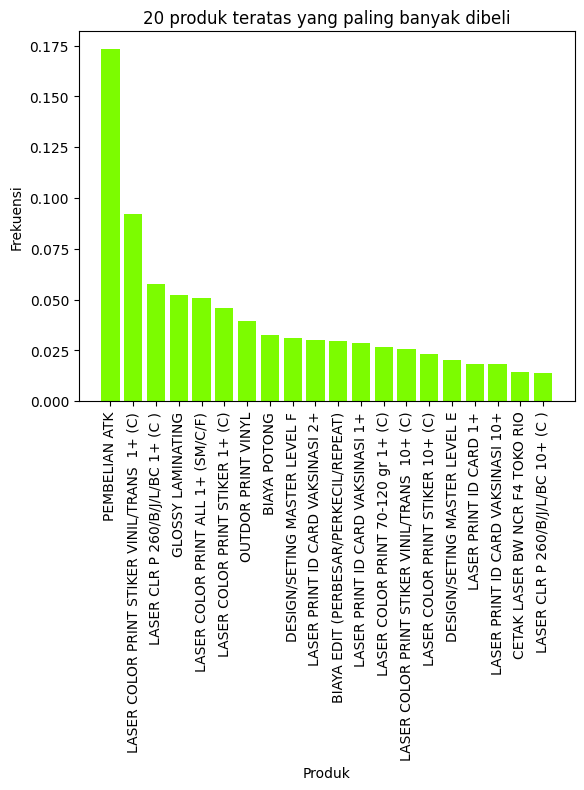

In [85]:
jumlah_produk    = df_bersih_2021.apply(pd.Series.value_counts)
total_sampel     = len(df_2021)
frekuensi_produk = jumlah_produk / total_sampel
produk_top       = frekuensi_produk.sum(axis=1).sort_values(ascending=False).head(20)

plt.bar(produk_top.index, produk_top.values, color='#7CFC00')
plt.xlabel('Produk')
plt.ylabel('Frekuensi')
plt.title('20 produk teratas yang paling banyak dibeli')
plt.xticks(rotation=90)
plt.show()

In [96]:
items_total_21['semua'] = "Tree Map"
items_total_21          = items_total_21.sort_values('transactions', ascending=False)

fig = px.treemap(items_total_21.head(20),
                 path=['semua', "items"],
                 values='transactions',
                 color=items_total_21["transactions"].head(20),
                 hover_data=['items'],
                 title="Peta Pohon berisi 20 produk teratas yang paling banyak muncul di keranjang belanja",
                 color_continuous_scale='Greens')

# Perbesar font label
fig.update_traces(textinfo="label+value", textfont_size=18)  # Ubah nilai textfont_size sesuai keinginan Anda

fig.show()

<IPython.core.display.Javascript object>

### Melakukan analisis frekuensi atau transaksi belanjaan
Melihat berapa produk yang dibeli dalam satu kali proses belanja

In [97]:
produk_per_transaksi = df_bersih_2021.count(axis=1)
produk_per_transaksi = produk_per_transaksi.value_counts()
produk_per_transaksi

1     39236
2     11059
3      2894
4       828
5       259
6       122
7        51
8        39
9        28
10       14
11       12
14       10
20        6
16        5
13        4
12        3
19        3
15        3
18        1
17        1
24        1
23        1
28        1
25        1
40        1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Jumlah produk yang dibeli dalam satu kali proses belanja')

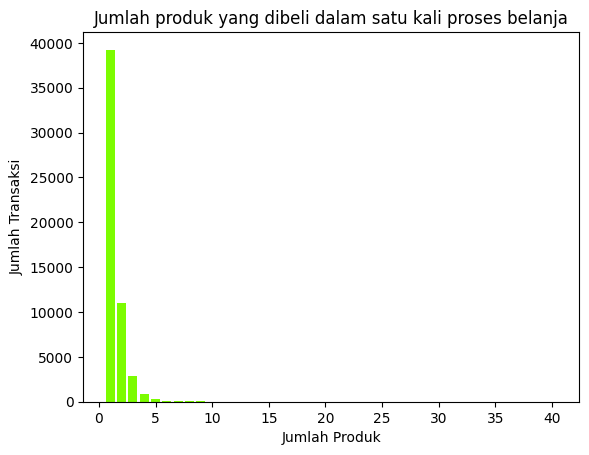

In [98]:
plt.bar(produk_per_transaksi.index, produk_per_transaksi.values, color='#7CFC00')
plt.xlabel('Jumlah Produk')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah produk yang dibeli dalam satu kali proses belanja')

Artinya dalam satu kali transaksi itu sangat sering produk yang dibeli berjumlah 1-5 jenis produk

<a id="1"></a> 
# <p style="padding:15px;background-color:#022629;margin:0;color:#91f2eb;font-family:Verdana,sans-serif;font-size:9-0%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:900">4. Modeling</p>

### Market Basket Analisis
Mencoba 3 algoritma berbeda:
- ECLAT (Equivalence Class Clustering and bottom-up Lattice Traversal)
- Apriori
- FP-Growth (Frequent Pattern Growth)


#### SImple explanation
**Market basket analysis** adalah teknik yang digunakan dalam bisnis ritel dan e-commerce untuk dan mengidentifikasi hubungan antara produk yang sering dibeli bersamaan. 

Dengan mengidentifikasi produk yang sering dibeli bersamaan, bisnis dapat mengoptimalkan penempatan produk, membuat promosi yang ditargetkan, dan meningkatkan pengalaman pelanggan.


**Associate Rule Mining** adalah teknik yang digunakan untuk mencari asosiasi antara satu item dengan item lainnya.

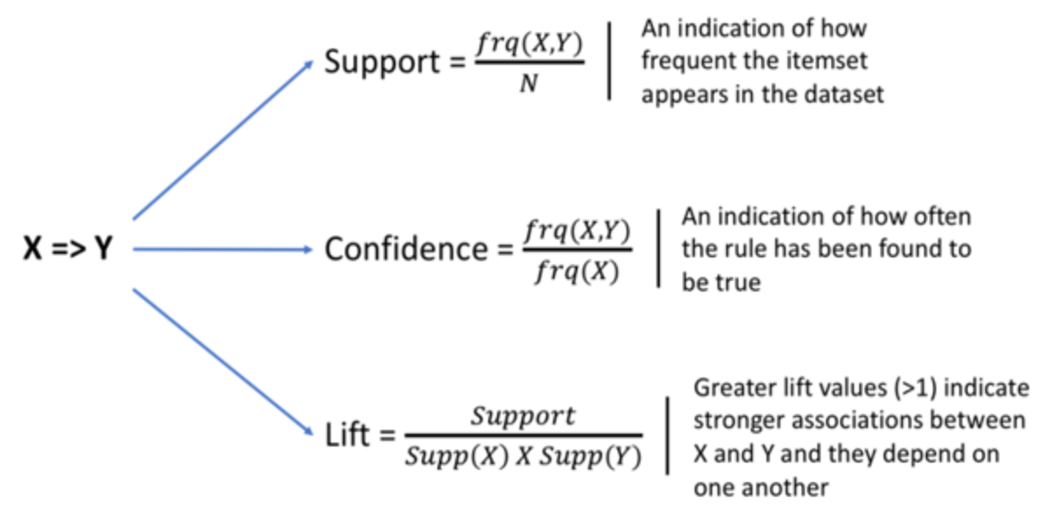

- Support (s): Mengukur seberapa sering suatu item atau kombinasi item muncul dalam dataset.
- Confidence (c): Mengukur seberapa sering item B muncul dalam transaksi yang mengandung item A.
- Lift (l): Mengukur seberapa banyak item B lebih mungkin dibeli ketika item A dibeli, dibandingkan dengan item B dibeli sendiri.

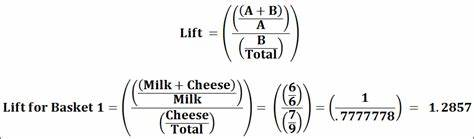

#### Insight
- Gunakan support yang lebih tinggi untuk mengidentifikasi set item yang umum dibeli.
- Gunakan confidence yang lebih tinggi untuk mengidentifikasi hubungan bersyarat yang kuat antar item.
- Gunakan lift yang lebih tinggi untuk mengidentifikasi itemset di mana pembelian bersama lebih sering terjadi daripada yang diharapkan secara kebetulan.

Semakin besar nilai support maka akan semakin besar menghitung hubungan-hubungan yang jarang dilakukan. (semakin buruk)


In [100]:
# menentukan s dan c minimal

min_supp = eval(input("Masukkan nilai support (s) minimum: ")) #0.001
min_conf = eval(input("Masukkan nilai confidence (c) minimum: ")) #0.01

Masukkan nilai support (s) minimum: 0.001
Masukkan nilai confidence (c) minimum: 0.01


### ECLAT

In [102]:
df_bersih_2021 = df_bersih_2021.reset_index(drop=True)

In [107]:
# mengubah struktur data menjadi setiap produk sebagai variabelnya
# setiap record data mewakili satu transaksi produk

df6   = df_bersih_2021.copy()
eclat = ECLAT(data=df6)

In [108]:
eclat.df_bin

,PLAKAT AKRILIK KOTAK 15MM KECIL TANPA BOX,KINGCO MAP SEKAT WARNA KUNING,SCOTCH ISOLASI MAGIC,AICE MILK MELON 50GR,PIPO STICKY NOTES 76x76 400 SHEETS,KUDA SURAT JALAN 25 x 3 BESAR,EPSON RIBBON PACK MAX 17.7 METERS SERIES 8750 WARNA HITAM,FABER-CASTEL PENGHAPUS HITAM KECIL 20-L-003121,JASA GRAVIR,CTK NCR 1/2F 1 WRN 3 PLY,...,MONTIS TISU 180 SHEET,TARGET TIPX CORRECTION TAPE CT-502C,MEMO PAD BW,PLASTIK UNDANGAN BENING UK. 15 x 25 CM,KINGCO MAP PLASTIK BUSINESS FILE WARNA PINK,PILOT PULPEN 0.7 G-2 HITAM,GLACIO TINTA FLASH KUNING,ENERGIZER BATERAI A76 ISI 2,KINGCO MAP KANCING KC4FC WARNA PINK,LASER COLOR PRINT AP 210-230gr 200+ (C/F)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
# suatu produk yang punya paling banyak kombinasi 1 sampai 2 produk

# menghitung seberapa lama proses pelatihan terhadap Eclat
waktu_mulai         = time.time()

min_kombinasi       = 1
max_kombinasi       = 2

rule_indices, rule_supports = eclat.fit(min_support     = min_supp, # (s)
                                        min_combination = min_kombinasi,
                                        max_combination = max_kombinasi,
                                        separator       = ', ',
                                        verbose         = True)

# waktu eksekusi untuk mencari kompleksitas waktu
waktu_eksekusi_eclat = time.time() - waktu_mulai

Combination 1 by 1


129it [02:04,  1.04it/s]


Combination 2 by 2


8256it [1:47:12,  1.28it/s]


In [110]:
# melihat aturan/rule yang memiliki kombinasi
rule_indices

{'COPY BW A1 (59.4x84cm) HVS': [56,
  64,
  300,
  1164,
  1169,
  1615,
  2429,
  2437,
  2487,
  2494,
  2536,
  2567,
  2616,
  2735,
  3044,
  3151,
  3256,
  3297,
  3544,
  3878,
  4221,
  17579,
  17816,
  18116,
  19486,
  19600,
  20092,
  20286,
  20287,
  20735,
  22035,
  22376,
  22907,
  23594,
  24153,
  24508,
  26180,
  27020,
  28626,
  28940,
  28978,
  29234,
  32779,
  32912,
  34788,
  35265,
  35268,
  35296,
  36428,
  36575,
  37918,
  38173,
  38756,
  39300,
  39338,
  40048,
  40219,
  40518,
  41333,
  42131,
  42379,
  42387,
  42664,
  44587,
  46216,
  46844,
  47702,
  48088,
  48527,
  48543,
  48882,
  48946,
  49435,
  49450,
  49721,
  49762,
  50708,
  52085,
  53013,
  54303],
 'LASER PRINT ID CARD VAKSINASI 1+': [21372,
  21390,
  21394,
  21463,
  21467,
  21468,
  21494,
  21523,
  21533,
  21549,
  21576,
  21577,
  21578,
  21593,
  21611,
  21647,
  21681,
  21687,
  21688,
  21697,
  21707,
  21736,
  21751,
  21787,
  21791,
  21802,
  218

### Tujuan eclat
Mengekstrak aturan asosiasi yang signifikan dari item-item yang sering muncul dalam dataset tersebut.

In [111]:
itemset = []

for i in list(rule_supports.keys()):
    i = i.split(', ')
    i = frozenset(i)
    itemset.append(i)

frek_itemset = pd.DataFrame({'support': list(rule_supports.values()), 
                             'itemsets': itemset})

frek_itemset

<IPython.core.display.Javascript object>

,support,itemsets
0,0.001466,(COPY BW A1 (59.4x84cm) HVS)
1,0.028525,(LASER PRINT ID CARD VAKSINASI 1+)
2,0.001099,(CTK NCR 1/4F 1 WRN 2 PLY)
3,0.001063,(TUMBLER TRAVEL THERMOS 500ML CETAK UV)
4,0.001319,(INKJET PLOTER COLOR A2 HVS 5270)
...,...,...
200,0.003224,"(BIAYA POTONG, GLOSSY LAMINATING)"
201,0.003646,"(BIAYA EDIT (PERBESAR/PERKECIL/REPEAT), BIAYA ..."
202,0.001008,"(LASER CLR P 260/B/J/L/BC 25+ (C ), BIAYA POTONG)"
203,0.001356,"(LASER COLOR PRINT STIKER 25+ (C), BIAYA POTONG)"


In [112]:
rule_ECLAT = association_rules(frek_itemset, 
                               metric="confidence", 
                               min_threshold=min_conf)

rule_ECLAT = rule_ECLAT[rule_ECLAT.lift > 1]
rule_ECLAT = rule_ECLAT.reset_index(drop=True)
rule_ECLAT

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CETAK LASER BW NCR F4 TOKO RIO),(JASA NOMOR NCR TOKORIO),0.014217,0.005936,0.004818,0.338918,57.096097,0.004734,1.503691,0.996655
1,(JASA NOMOR NCR TOKORIO),(CETAK LASER BW NCR F4 TOKO RIO),0.005936,0.014217,0.004818,0.811728,57.096097,0.004734,5.235963,0.988352
2,(COPY LASER COLOR A4/F4 70/80GR (C )),(COPY LASER COLOR A4/A3 150-260gr/SLIDE (C )),0.009380,0.004892,0.001099,0.117188,23.956724,0.001053,1.127202,0.967332
3,(COPY LASER COLOR A4/A3 150-260gr/SLIDE (C )),(COPY LASER COLOR A4/F4 70/80GR (C )),0.004892,0.009380,0.001099,0.224719,23.956724,0.001053,1.277756,0.962969
4,(COPY LASER COLOR A4/F4 70/80GR (C )),(LASER COLOR PRINT ALL 1+ (SM/C/F)),0.009380,0.050913,0.001392,0.148438,2.915496,0.000915,1.114524,0.663226
...,...,...,...,...,...,...,...,...,...,...
133,(BIAYA POTONG),(LASER CLR P 260/B/J/L/BC 25+ (C )),0.032464,0.010406,0.001008,0.031038,2.982689,0.000670,1.021293,0.687036
134,(LASER COLOR PRINT STIKER 25+ (C)),(BIAYA POTONG),0.010589,0.032464,0.001356,0.128028,3.943643,0.001012,1.109594,0.754416
135,(BIAYA POTONG),(LASER COLOR PRINT STIKER 25+ (C)),0.032464,0.010589,0.001356,0.041761,3.943643,0.001012,1.032530,0.771473
136,(LASER COLOR PRINT AP 210-230 gr 200+ (C )),(LASER COLOR PRINT STIKER VINIL/TRANS 200+ (C)),0.007328,0.011377,0.001667,0.227500,19.996188,0.001584,1.279771,0.957004


### Algoritma Apriori

In [114]:
df7 = df_bersih_2021.copy()
df7 = df7.replace(np.nan, None)
df7.head()

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,CETAK LASER BW NCR F4 TOKO RIO,JASA NOMOR NCR TOKORIO,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,LASER CLR P 260/B/J/L/BC 1+ (C ),DOFF LAMINATING,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,LASER COLOR PRINT STIKER VINIL/TRANS 1+ (C),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,KARTU NAMA UK.STD (54x90) 2 MUKA 1+,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,LASER COLOR PRINT STIKER VINIL/TRANS 10+ (C),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


mencoba menggunakan teknik encoding/binari baru selain one hot sebelumnya, yaitu:

**Transaction Encoder**: Teknik encoding yang cocok digunakan ketika ingin menerapkannya pada algoritma Apriori. TransactionEncoder akan menerjemahkan setiap transaksi (baris data) menjadi vektor biner, di mana setiap kolom vektor mewakili keberadaan atau ketiadaan item tertentu dalam transaksi.

In [115]:
# Membuat daftar array list kumpulan item yang berisi item yang dibeli pelanggan

transaksi = []

for _, row in df7.iterrows():
    temp = []
    
    for column, value in row.items():
        
        if value is not None:
            i = f"{value}"
            temp.append(i)
        transaksi.append(temp)

In [121]:
len(transaksi)

2674567

In [117]:
encode_tran = TransactionEncoder()
array_tran  = encode_tran.fit(transaksi).transform(transaksi)

df8         = pd.DataFrame(array_tran, columns=encode_tran.columns_)
df8

MemoryError: Unable to allocate 5.47 GiB for an array with shape (2674567, 2194) and data type bool

In [ ]:
df8.duplicated().sum()

In [ ]:
df8 = df8.drop_duplicates()

In [ ]:
df8.head()

In [ ]:
# memeriksa apakah toothpaste masih paling banyak

hitung = 0

for i in transaksi:
    for j in i:
        if j == 'PEMBELIAN ATK':
            hitung += 1
print(hitung)

df8['PEMBELIAN ATK'].value_counts()

In [ ]:
df8.head(5)

In [ ]:
waktu_mulai          = time.time()
apr                  = apriori(df8,
                              min_support=min_supp,
                              use_colnames=True)

apr.itemsets


elapsed_time_apriori = time.time() - waktu_mulai

In [ ]:
waktu_mulai          = time.time()

rule_APR             = association_rules(apr,
                                         metric='confidence',
                                         min_threshold=min_conf)

rule_APR             = rule_APR[rule_APR.lift > 1]
rule_APR             = rule_APR.reset_index(drop=True)

elapsed_time_apriori = elapsed_time_apriori + time.time() - waktu_mulai
rule_APR

### Algoritma FP-Growth

In [ ]:
df9 = df_bersih_21.replace(np.nan, None)
df9.head()

In [ ]:
transaksi2 = []

for _, row in df9.iterrows():
    temp = [item for item in row if item is not None]
    transaksi2.append(temp)
    
transaksi2

In [ ]:
encode_tran2  = TransactionEncoder()
array_tran_fp = encode_tran2.fit(transaksi2).transform(transaksi2)

df9 = pd.DataFrame(array_tran_fp, columns=encode_tran2.columns_)
df9.head(5)

In [ ]:
waktu_mulai = time.time()
fpg         = fpgrowth(df9,
                       min_support  = min_supp,
                       use_colnames = True)

elapsed_time_fpgrowth = time.time() - waktu_mulai

In [ ]:
waktu_mulai = time.time()

rule_FP     = association_rules(fpg,
                                metric="confidence",
                                min_threshold=min_conf) #0.01

rule_FP     = rule_FP[rule_FP.lift > 1]
rule_FP     = rule_FP.reset_index(drop=True)

elapsed_time_fpgrowth += time.time() - waktu_mulai

rule_FP

<a id="1"></a> 
# <p style="padding:15px;background-color:#022629;margin:0;color:#91f2eb;font-family:Verdana,sans-serif;font-size:9-0%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:900">5. Evaluation</p>

### Evaluation: Algorithm MBA Result
Mempertimbangkan beberapa hal seperti:
- Kompleksitas Waktu
- support (s), confidence (c), dan lift (L)

In [ ]:
x = ["ECLAT", "Apriori", "FP-Growth"]
y = [waktu_eksekusi_eclat, elapsed_time_apriori, elapsed_time_fpgrowth]

plt.bar(x, y, color='#7CFC00')
plt.xlabel("Algoritma MBA")
plt.ylabel("waktu dalam detik")
plt.title("Kompleksitas Waktu")
plt.show()

In [ ]:
x = ["ECLAT", "Apriori", "FP-Growth"]
y = [len(rule_ECLAT), len(rule_APR), len(rule_FP)]

plt.bar(x, y, color='#7CFC00')
plt.xlabel("Algoritma")
plt.ylabel("Jumlah Aturan yang dihasilkan")
plt.title("Jumlah Aturan atau Rule berhubungan / Rule Association")
plt.show()

In [ ]:
# Membandingkan nilai support (s) dari aturan asosiasi tiap algoritma

k   = min(len(rule_ECLAT), len(rule_APR), len(rule_FP)) # jml min aturan asosiasi yang ada
x   = [i for i in range(1, k+1)]                        # list

y1  = rule_ECLAT["support"].tail(k)
y2  = rule_APR["support"].tail(k)
y3  = rule_FP["support"].tail(k)

plt.figure(figsize=(8,4))
plt.plot(x, y1, label='ECLAT')
plt.plot(x, y2, label='Apriori')
plt.plot(x, y3, label='FP-Growth')

plt.xlabel('Aturan Asosiasi')
plt.ylabel('Nilai support (s)')
plt.title('Membandingkan nilai support (s)')

plt.legend()
plt.show()

In [ ]:
# Membandingkan nilai support (s) dari aturan asosiasi tiap algoritma

k   = min(len(rule_ECLAT), len(rule_APR), len(rule_FP)) # jml min aturan asosiasi yang ada
x   = [i for i in range(1, k+1)]                        # list

y1  = rule_ECLAT["support"].sort_values().tail(k)       # diurutkan terlebih dahulu, lalu ditampilkan
y2  = rule_APR["support"].sort_values().tail(k)
y3  = rule_FP["support"].sort_values().tail(k)

plt.figure(figsize=(8,4))
plt.plot(x, y1, label='ECLAT')
plt.plot(x, y2, label='Apriori')
plt.plot(x, y3, label='FP-Growth')

plt.xlabel('Aturan Asosiasi')
plt.ylabel('Nilai support (s)')
plt.title('Membandingkan nilai support (s)')

plt.legend()
plt.show()

In [ ]:
# Membandingkan nilai confidence (c) dari aturan asosiasi tiap algoritma

k   = min(len(rule_ECLAT), len(rule_APR), len(rule_FP)) # jml min aturan asosiasi yang ada
x   = [i for i in range(1, k+1)]                        # list

y1  = rule_ECLAT["confidence"].sort_values().tail(k)    # diurutkan terlebih dahulu, lalu ditampilkan
y2  = rule_APR["confidence"].sort_values().tail(k)
y3  = rule_FP["confidence"].sort_values().tail(k)

plt.figure(figsize=(8,4))
plt.plot(x, y1, label='ECLAT')
plt.plot(x, y2, label='Apriori')
plt.plot(x, y3, label='FP-Growth')

plt.xlabel('Aturan Asosiasi')
plt.ylabel('Nilai Confidence')
plt.title('Membandingkan nilai confidence (c)')

plt.legend()
plt.show()

In [ ]:
# Membandingkan nilai lift (l) dari aturan asosiasi tiap algoritma

k   = min(len(rule_ECLAT), len(rule_APR), len(rule_FP)) # jml min aturan asosiasi yang ada
x   = [i for i in range(1, k+1)]                        # list

y1  = rule_ECLAT["lift"].sort_values().tail(k)    # diurutkan terlebih dahulu, lalu ditampilkan
y2  = rule_APR["lift"].sort_values().tail(k)
y3  = rule_FP["lift"].sort_values().tail(k)

plt.figure(figsize=(8,4))
plt.plot(x, y1, label='ECLAT')
plt.plot(x, y2, label='Apriori')
plt.plot(x, y3, label='FP-Growth')

plt.xlabel('Aturan Asosiasi')
plt.ylabel('Nilai Lift')
plt.title('Membandingkan nilai lift (l)')

plt.legend()
plt.show()

In [ ]:
# Mencari hubungan antara s, c, dan L pada suatu algoritma
custom_green_scale = [
                 [0.0, "lightgreen"],
                 [0.5, "limegreen"],
                 [1.0, "green"]
]

def banding_algoritma(rule, nama_rule):    
    fig = px.scatter(rule,
                     x     = 'support',
                     y     = 'lift',
                     color = 'confidence',
                     color_continuous_scale=custom_green_scale,
                     title = f'Hubungan antara support, confidence, dan lift dalam algoritma {nama_rule}')
    
    fig.show()

In [ ]:
# Hubungan s, c, dan L pada algoritma ECLAT

banding_algoritma(rule_ECLAT, 'ECLAT')

In [ ]:
# Hubungan s, c, dan L pada algoritma Apriori

banding_algoritma(rule_APR, 'Apriori')

In [ ]:
# Hubungan s, c, dan L pada algoritma FP-Growth

banding_algoritma(rule_FP, 'FP-Growth')

- Algoritma ECLAT memiliki Kompleksitas waktu (detik) paling tinggi yaitu 78 jika dibandingkan dengan FP-Growth yang paling rendah yaitu 1.
- Algoritma ECLAT dan FP-Growth memiliki jumlah aturan (association rules) yang paling tinggi yaitu berkisar 1750, sedangkan Apriori 750.
- Support pada algoritma Apriori cukup besar sehingga dapat mengurangi jumlah rule yang dihasilkan, fokus pada itemset yang lebih umum dan signifikan.
- Confidence dari algoritma Apriori memiliki performa yang lebih baik dikarenakan memiliki rule yang kuat.
- Nilai lift yang ideal biasanya ada di rentang 1.2 - 1.5 hal ini dibuktikan oleh performa dari algoritma Apriori. Namun algoritma FP-Growth memiliki lift yang lebih besar sehingga menunjukkan hubungan yang lebih kuat antara itemset A dan B dibandingkan jika mereka independen.


## Evaluation Result

**FP-Growth** adalah algoritma yang memiliki performa terbaik secara keseluruhan untuk Market Basket Analysis. Waktu eksekusinya sangat cepat, menghasilkan banyak aturan yang bisa memberikan banyak wawasan, dan nilai lift yang lebih besar menunjukkan hubungan itemset yang kuat.

Namun, jikasaja ingin  mencari aturan yang lebih mudah dianalisis dan diandalkan, **Apriori** juga merupakan pilihan yang baik karena menghasilkan aturan yang lebih kuat dan signifikan dengan nilai lift dalam rentang ideal.

**ECLAT** tidak direkomendasikan jika waktu eksekusi menjadi faktor penting karena kompleksitas waktu yang tinggi.

In [ ]:
items_total_bersih = df_bersih_21.apply(pd.Series.value_counts).sum(axis=1)
items_total_bersih = pd.DataFrame({'item': items_total_bersih.index, 'transaksi': items_total_bersih.values})

# Mendapatkan 15 produk teratas
top_15_items = items_total_bersih.sort_values('transaksi', ascending=False).head(15).reset_index(drop=True)
top_15_items.style.background_gradient(cmap='Greens')

### Cara Rekomendasi
Ambil 10 product TOP, lalu cari rekomendasi acak dari 10 produk top tersebut berdasarkan id transaksi yang top juga